<a href="https://colab.research.google.com/github/usma-stats/ma206x/blob/main/lesson_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA206X Lesson 3: Measures of Location - Computational Companion

**Course:** MA206X Probability and Statistics  
**Instructor:** CPT Day  
**Term:** AY26-2

This notebook provides computational support for Lesson 3 worksheet problems. Use this to:
- Perform calculations for large datasets
- Visualize distributions
- Verify your hand calculations

**Instructions:**
1. Run each code cell in order (Shift+Enter)
2. Complete the worksheet problems using the output from this notebook
3. Focus on *interpreting* results rather than manual computation

---

## Welcome to R!

This is your **first lesson using R**. R is a powerful programming language designed specifically for statistical computing and data visualization.

**Why R?**
- Built for statistics (unlike general languages like Python)
- Industry standard for data science and research
- Excellent for creating publication-quality graphics
- Free and open-source

**R Basics You'll Learn Today:**
- Creating vectors (lists of numbers) with `c()`
- Computing statistics: `mean()`, `median()`, `quantile()`
- Making plots with `ggplot2`
- Using `$` to access data frame columns

**Running Code:**
- Click the play button (▶) in each code cell
- Or press Shift+Enter
- Code runs top to bottom - don't skip cells!

Don't worry if you don't understand every line - focus on interpreting the output!

In [ ]:
# Uncomment these lines if packages aren't installed:
# install.packages("tidyverse")
install.packages("gridExtra")

library(gridExtra)

# Load packages
library(tidyverse)    # For plots and data manipulation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




---
## Problem 1: Exam Scores

Let's verify the calculations for the exam scores problem.

**R Concepts:**
- `c()` creates a vector (list of numbers)
- `mean()`, `median()` compute statistics
- `sort()` arranges values in order
- `table()` counts frequencies (for finding mode)

In [ ]:
X = c(72, 85, 90, 78, 85, 92, 88, 85, 95)

In [ ]:
mean(X)

[1] 85.55556

In [ ]:
median(X)

[1] 85

In [ ]:
table(X)

X
72 78 85 88 90 92 95 
 1  1  3  1  1  1  1 

In [ ]:
# Create a vector of exam scores
# In R, we use c() to combine values into a vector
exam_scores <- c(72, 85, 90, 78, 85, 92, 88, 85, 95)

# Calculate measures of center
mean_score <- mean(exam_scores)
median_score <- median(exam_scores)

# Find the mode (most frequent value)
# R doesn't have a built-in mode function, so we use table()
score_table <- table(exam_scores)
mode_score <- as.numeric(names(score_table)[which.max(score_table)])

# Display results
cat("Exam Scores (sorted):", sort(exam_scores), "\n\n")
cat("Mean:  ", round(mean_score, 2), "\n")
cat("Median:", median_score, "\n")
cat("Mode:  ", mode_score, "\n")

Exam Scores (sorted): 72 78 85 85 85 88 90 92 95 

Mean:   85.56 
Median: 85 
Mode:   85 


In [ ]:
# Visualize the data
# Create a data frame for plotting (ggplot2 likes data frames)
exam_df <- data.frame(scores = exam_scores)

# Create histogram
p1 <- ggplot(exam_df, aes(x = scores)) +
  geom_histogram(bins = 8, fill = "steelblue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_score, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = median_score, color = "blue", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribution of Exam Scores",
       x = "Score",
       y = "Frequency") +
  annotate("text", x = mean_score + 5, y = 3,
           label = paste("Mean =", round(mean_score, 1)), color = "red") +
  annotate("text", x = median_score - 5, y = 2.5,
           label = paste("Median =", median_score), color = "blue") +
  theme_minimal()

# Create boxplot
p2 <- ggplot(exam_df, aes(y = scores)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(title = "Boxplot of Exam Scores",
       y = "Score") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

# Display plots side by side
grid.arrange(p1, p2, ncol = 2)

cat("\n📊 The histogram shows the distribution of scores.\n")
cat("📦 The boxplot shows the five-number summary (min, Q1, median, Q3, max).\n")

---
## Problem 2: Tech Startup Salaries

Analyzing salary distribution with an outlier (CEO salary).

**Key Concept:** See how ONE outlier affects mean vs. median!

In [ ]:
# Salaries in thousands of dollars
salaries <- c(45, 48, 52, 55, 58, 60, 62, 65, 68, 72, 75, 250)

# With CEO (all 12 salaries)
mean_with_ceo <- mean(salaries)
median_with_ceo <- median(salaries)

# Without CEO (remove last element)
salaries_no_ceo <- salaries[1:11]  # Keep elements 1 through 11
mean_without_ceo <- mean(salaries_no_ceo)
median_without_ceo <- median(salaries_no_ceo)

# Display results
cat("WITH CEO:\n")
cat("Mean:  $", round(mean_with_ceo, 1), "k\n", sep = "")
cat("Median: $", median_with_ceo, "k\n\n", sep = "")

cat("WITHOUT CEO:\n")
cat("Mean:  $", round(mean_without_ceo, 1), "k\n", sep = "")
cat("Median: $", median_without_ceo, "k\n\n", sep = "")

# Calculate changes
mean_change <- mean_with_ceo - mean_without_ceo
median_change <- median_with_ceo - median_without_ceo

cat("CHANGES:\n")
cat("Mean changed by:  $", round(mean_change, 1), "k (",
    round(100 * mean_change / mean_without_ceo, 1), "%)\n", sep = "")
cat("Median changed by: $", round(median_change, 1), "k (",
    round(100 * median_change / median_without_ceo, 1), "%)\n", sep = "")

cat("\n💡 Notice: The MEAN changed by", round(mean_change, 1), "k, but the MEDIAN only changed by",
    round(median_change, 1), "k!\n")
cat("   This shows the median is RESISTANT to outliers.\n")

WITH CEO:
Mean:  $75.8k
Median: $61k

WITHOUT CEO:
Mean:  $60k
Median: $60k

CHANGES:
Mean changed by:  $15.8k (26.4%)
Median changed by: $1k (1.7%)

💡 Notice: The MEAN changed by 15.8 k, but the MEDIAN only changed by 1 k!
   This shows the median is RESISTANT to outliers.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


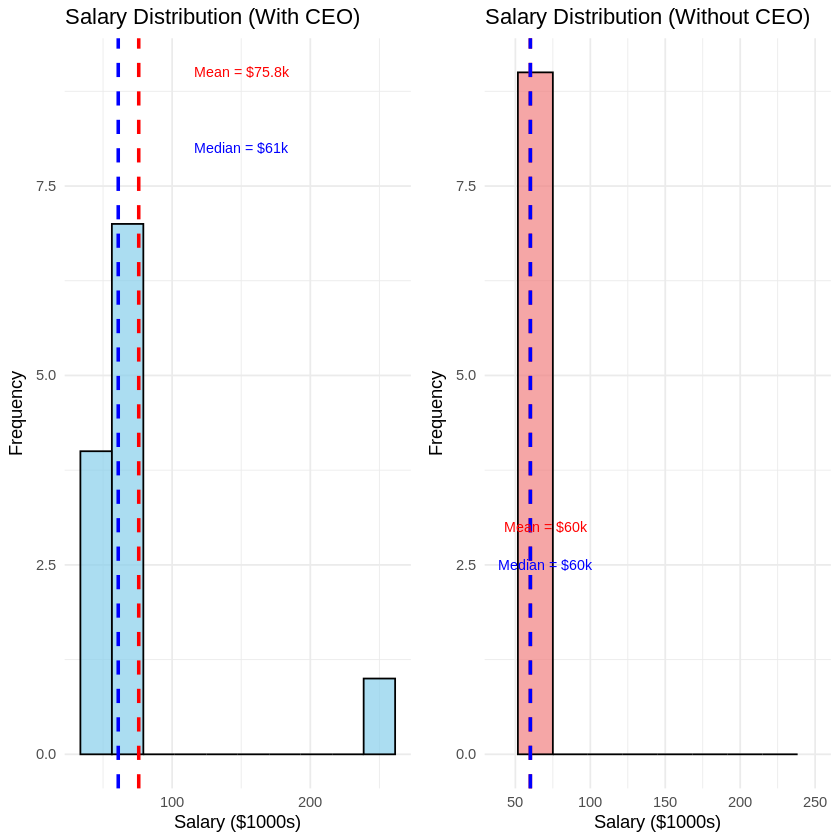

In [ ]:
# Visualize the impact of the outlier

# Create data frames for plotting
df_with_ceo <- data.frame(salary = salaries, scenario = "With CEO")
df_without_ceo <- data.frame(salary = salaries_no_ceo, scenario = "Without CEO")

# Plot 1: With CEO
p1 <- ggplot(df_with_ceo, aes(x = salary)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_with_ceo, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = median_with_ceo, color = "blue", linetype = "dashed", linewidth = 1) +
  labs(title = "Salary Distribution (With CEO)",
       x = "Salary ($1000s)",
       y = "Frequency") +
  annotate("text", x = 150, y = 9,
           label = paste("Mean = $", round(mean_with_ceo, 1), "k", sep = ""),
           color = "red", size = 3) +
  annotate("text", x = 150, y = 8,
           label = paste("Median = $", median_with_ceo, "k", sep = ""),
           color = "blue", size = 3) +
  theme_minimal()

# Plot 2: Without CEO
p2 <- ggplot(df_without_ceo, aes(x = salary)) +
  geom_histogram(bins = 10, fill = "lightcoral", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_without_ceo, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = median_without_ceo, color = "blue", linetype = "dashed", linewidth = 1) +
  labs(title = "Salary Distribution (Without CEO)",
       x = "Salary ($1000s)",
       y = "Frequency") +
  annotate("text", x = 70, y = 3,
           label = paste("Mean = $", round(mean_without_ceo, 1), "k", sep = ""),
           color = "red", size = 3) +
  annotate("text", x = 70, y = 2.5,
           label = paste("Median = $", median_without_ceo, "k", sep = ""),
           color = "blue", size = 3) +
  xlim(40, 250) +  # Same scale as first plot for comparison
  theme_minimal()

# Display plots
grid.arrange(p1, p2, ncol = 2)

---
## Problem 4: Standardized Test Scores

Working with quartiles and percentiles.

**R Function:** `quantile()` computes percentiles and quartiles

In [ ]:
# Sample test scores dataset
set.seed(42)  # For reproducibility
test_scores <- c(65, 68, 70, 71, 72, 72, 73, 75, 76, 78,
                 79, 80, 81, 82, 83, 85, 86, 87, 88, 89,
                 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 205)

# Calculate summary statistics
mean_test <- mean(test_scores)
median_test <- median(test_scores)

# Calculate quartiles using quantile()
# quantile() takes a vector and probabilities (0.25 = 25th percentile, etc.)
q1_test <- quantile(test_scores, 0.25)
q3_test <- quantile(test_scores, 0.75)
iqr_test <- q3_test - q1_test

# Display results
cat("Test Scores Summary Statistics:\n")
cat("================================\n")
cat("Mean:   ", round(mean_test, 1), "\n")
cat("Median (Q2):", median_test, "\n")
cat("Q1 (25th percentile):", q1_test, "\n")
cat("Q3 (75th percentile):", q3_test, "\n")
cat("IQR (Q3 - Q1):", iqr_test, "\n\n")

cat("Minimum:", min(test_scores), "\n")
cat("Maximum:", max(test_scores), "\n\n")

# Where does a score of 85 fall?
percentile_85 <- sum(test_scores <= 85) / length(test_scores) * 100
cat("A score of 85 is at the", round(percentile_85), "th percentile\n")

cat("\n📈 Interpretation: A student scoring 85 performed better than",
    round(percentile_85), "% of students.\n")

Test Scores Summary Statistics:
Mean:    87.4 
Median (Q2): 85 
Q1 (25th percentile): 75.5 
Q3 (75th percentile): 92.5 
IQR (Q3 - Q1): 17 

Minimum: 65 
Maximum: 205 

A score of 85 is at the 52 th percentile

📈 Interpretation: A student scoring 85 performed better than 52 % of students.



📦 Boxplot Components:
   • Box edges = Q1 and Q3 (middle 50% of data)
   • Line in box = Median (Q2)
   • Whiskers = Extend to min and max (if no outliers)


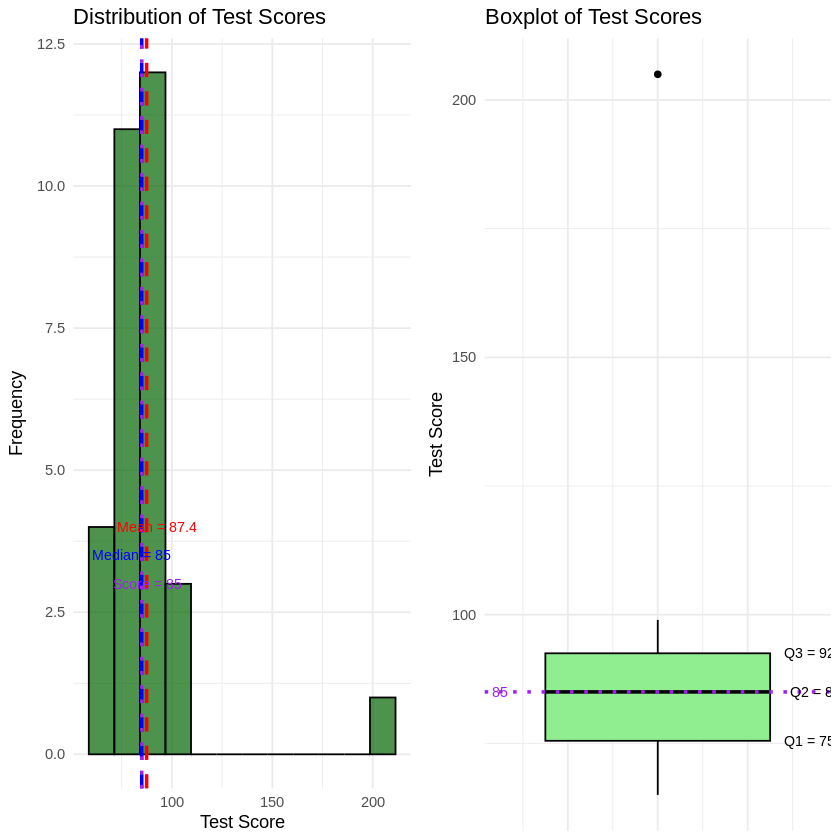

In [ ]:
# Visualize test scores with quartiles
test_df <- data.frame(scores = test_scores)

# Histogram with mean and median
p1 <- ggplot(test_df, aes(x = scores)) +
  geom_histogram(bins = 12, fill = "darkgreen", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_test, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = median_test, color = "blue", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = 85, color = "purple", linetype = "dotted", linewidth = 1) +
  labs(title = "Distribution of Test Scores",
       x = "Test Score",
       y = "Frequency") +
  annotate("text", x = mean_test + 5, y = 4,
           label = paste("Mean =", round(mean_test, 1)), color = "red", size = 3) +
  annotate("text", x = median_test - 5, y = 3.5,
           label = paste("Median =", median_test), color = "blue", size = 3) +
  annotate("text", x = 85 + 3, y = 3,
           label = "Score = 85", color = "purple", size = 3) +
  theme_minimal()

# Boxplot with quartile annotations
p2 <- ggplot(test_df, aes(y = scores)) +
  geom_boxplot(fill = "lightgreen", color = "black", width = 0.5) +
  geom_hline(yintercept = 85, color = "purple", linetype = "dotted", linewidth = 1) +
  labs(title = "Boxplot of Test Scores",
       y = "Test Score") +
  annotate("text", x = 0.35, y = q1_test,
           label = paste("Q1 =", q1_test), size = 3) +
  annotate("text", x = 0.35, y = median_test,
           label = paste("Q2 =", median_test), size = 3) +
  annotate("text", x = 0.35, y = q3_test,
           label = paste("Q3 =", q3_test), size = 3) +
  annotate("text", x = -0.35, y = 85,
           label = "85", color = "purple", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

# Display plots
grid.arrange(p1, p2, ncol = 2)

cat("\n📦 Boxplot Components:\n")
cat("   • Box edges = Q1 and Q3 (middle 50% of data)\n")
cat("   • Line in box = Median (Q2)\n")
cat("   • Whiskers = Extend to min and max (if no outliers)\n")

---
## Problem 5: Food Delivery Times

Analyzing delivery time distribution using five-number summary.

**Five-Number Summary:** Min, Q1, Median, Q3, Max

In [ ]:
# Delivery time data (in minutes)
set.seed(123)
delivery_times <- c(18, 20, 22, 23, 24, 25, 26, 27, 28, 29,
                    30, 31, 32, 33, 34, 35, 36, 38, 40, 42,
                    44, 46, 48, 50, 52, 55, 58, 60, 62, 65)

# Calculate five-number summary
# summary() gives Min, Q1, Median, Mean, Q3, Max automatically!
cat("Five-Number Summary:\n")
cat("====================\n")
print(summary(delivery_times))

# Calculate specific values for reference
min_time <- min(delivery_times)
q1_time <- quantile(delivery_times, 0.25)
median_time <- median(delivery_times)
q3_time <- quantile(delivery_times, 0.75)
max_time <- max(delivery_times)
iqr_time <- q3_time - q1_time

cat("\nIQR:", iqr_time, "minutes\n\n")

# What percentile is 35 minutes?
percentile_35 <- sum(delivery_times <= 35) / length(delivery_times) * 100
cat("35 minutes is approximately the", round(percentile_35), "th percentile\n")

# Percentage at or below 42 minutes (Q3)
percent_below_42 <- sum(delivery_times <= 42) / length(delivery_times) * 100
cat("Percentage of deliveries ≤ 42 minutes:", round(percent_below_42), "%\n\n")

cat("💡 Interpretation:\n")
cat("   • 50% of deliveries took ≤", median_time, "minutes (median)\n")
cat("   • 75% of deliveries took ≤", q3_time, "minutes (Q3)\n")
cat("   • Middle 50% of deliveries ranged from", q1_time, "to", q3_time, "minutes (IQR =", iqr_time, ")\n")

In [ ]:
# Visualize delivery times
delivery_df <- data.frame(time = delivery_times)

# Histogram with 35-minute target line
p1 <- ggplot(delivery_df, aes(x = time)) +
  geom_histogram(bins = 15, fill = "orange", color = "black", alpha = 0.7) +
  geom_vline(xintercept = median_time, color = "blue", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = 35, color = "red", linetype = "dotted", linewidth = 1) +
  labs(title = "Distribution of Delivery Times",
       x = "Delivery Time (minutes)",
       y = "Frequency") +
  annotate("text", x = median_time + 5, y = 4,
           label = paste("Median =", median_time, "min"), color = "blue", size = 3) +
  annotate("text", x = 35 + 5, y = 3,
           label = "35 min target", color = "red", size = 3) +
  theme_minimal()

# Boxplot with 35-minute line
p2 <- ggplot(delivery_df, aes(y = time)) +
  geom_boxplot(fill = "lightyellow", color = "black", width = 0.5) +
  geom_hline(yintercept = 35, color = "red", linetype = "dotted", linewidth = 1) +
  labs(title = "Boxplot of Delivery Times",
       y = "Delivery Time (minutes)") +
  annotate("text", x = 0.35, y = q1_time,
           label = paste("Q1=", q1_time), size = 3) +
  annotate("text", x = 0.35, y = median_time,
           label = paste("Q2=", median_time), size = 3) +
  annotate("text", x = 0.35, y = q3_time,
           label = paste("Q3=", q3_time), size = 3) +
  annotate("text", x = -0.3, y = 35,
           label = "35 min\ntarget", color = "red", size = 2.5) +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

# Display plots
grid.arrange(p1, p2, ncol = 2)

cat("\n⚠️  Notice: The 35-minute 'promise' falls below the median!\n")
cat("   This means more than 50% of deliveries take LONGER than 35 minutes.\n")
cat("   This promise might not be realistic for this service.\n")

---
## Problem 8: Retail Store Customer Spending

Analyzing customer spending with a right-skewed distribution.

**Key Concept:** Right-skewed means Mean > Median (pulled up by high spenders)

In [ ]:
# Customer spending data
set.seed(456)
spending <- c(15, 20, 25, 30, 35, 40, 45, 45, 45, 45, 48, 50, 52, 55, 58,
              60, 65, 70, 75, 80, 85, 85, 90, 95, 100, 110, 120, 130, 145,
              150, 160, 175, 190, 210, 230, 250, 275, 300, 350, 400)

# Calculate summary statistics
mean_spending <- mean(spending)
median_spending <- median(spending)
mode_spending <- 45  # Most frequent value (appears 4 times)
q1_spending <- quantile(spending, 0.25)
q3_spending <- quantile(spending, 0.75)
iqr_spending <- q3_spending - q1_spending

# Display summary
cat("Customer Spending Summary:\n")
cat("=========================\n")
cat("Mean:  $", round(mean_spending, 2), "\n", sep = "")
cat("Median: $", median_spending, "\n", sep = "")
cat("Mode:   $", mode_spending, "\n", sep = "")
cat("Q1:     $", q1_spending, "\n", sep = "")
cat("Q3:     $", q3_spending, "\n", sep = "")
cat("IQR:    $", iqr_spending, "\n\n", sep = "")

cat("Difference (Mean - Median): $", round(mean_spending - median_spending, 2), "\n\n", sep = "")

cat("📊 Interpretation: Mean > Median indicates RIGHT-SKEWED distribution\n")
cat("   This suggests some customers spend much more than typical.\n\n")

# Additional insights
cat("ADDITIONAL INSIGHTS:\n")
cat("===================\n")
pct_under_100 <- sum(spending <= 100) / length(spending) * 100
pct_over_200 <- sum(spending >= 200) / length(spending) * 100
cat("Percentage of customers spending ≤ $100:", round(pct_under_100, 1), "%\n")
cat("Percentage of customers spending ≥ $200:", round(pct_over_200, 1), "%\n\n")

cat("💡 For 'typical customer' benchmark, use MEDIAN ($", median_spending, ")\n", sep = "")
cat("   because it's not affected by high-spending outliers.\n")

In [ ]:
# Comprehensive visualization of spending data
spending_df <- data.frame(amount = spending)

# Plot 1: Histogram with mean, median, and mode
# Using cyan4 instead of teal (which isn't a standard R color)
p1 <- ggplot(spending_df, aes(x = amount)) +
  geom_histogram(bins = 20, fill = "cyan4", color = "black", alpha = 0.7) +
  geom_vline(xintercept = mean_spending, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = median_spending, color = "blue", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = mode_spending, color = "green", linetype = "dotted", linewidth = 1) +
  labs(title = "Distribution of Customer Spending (Right-Skewed)",
       x = "Spending Amount ($)",
       y = "Frequency") +
  annotate("text", x = 300, y = 8,
           label = paste("Mean = $", round(mean_spending), sep = ""),
           color = "red", size = 3) +
  annotate("text", x = 300, y = 7,
           label = paste("Median = $", median_spending, sep = ""),
           color = "blue", size = 3) +
  annotate("text", x = 300, y = 6,
           label = paste("Mode = $", mode_spending, sep = ""),
           color = "green", size = 3) +
  theme_minimal()

# Plot 2: Boxplot
p2 <- ggplot(spending_df, aes(y = amount)) +
  geom_boxplot(fill = "lightblue", color = "black", width = 0.5) +
  labs(title = "Boxplot of Customer Spending",
       y = "Spending Amount ($)") +
  annotate("text", x = 0.35, y = q1_spending,
           label = paste("Q1=$", round(q1_spending), sep = ""), size = 3) +
  annotate("text", x = 0.35, y = median_spending,
           label = paste("Q2=$", round(median_spending), sep = ""), size = 3) +
  annotate("text", x = 0.35, y = q3_spending,
           label = paste("Q3=$", round(q3_spending), sep = ""), size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

# Plot 3: Cumulative distribution
spending_sorted <- sort(spending)
cumulative_pct <- (1:length(spending)) / length(spending) * 100
cumulative_df <- data.frame(spending = spending_sorted, percentile = cumulative_pct)

p3 <- ggplot(cumulative_df, aes(x = spending, y = percentile)) +
  geom_line(color = "purple", linewidth = 1) +
  geom_hline(yintercept = 50, linetype = "dashed", color = "blue", alpha = 0.5) +
  geom_vline(xintercept = median_spending, linetype = "dashed", color = "blue", alpha = 0.5) +
  labs(title = "Cumulative Distribution",
       x = "Spending Amount ($)",
       y = "Cumulative Percentage") +
  annotate("text", x = median_spending + 50, y = 50,
           label = "Median (50th %ile)", color = "blue", size = 3) +
  theme_minimal()

# Display all plots
grid.arrange(p1, p2, p3, ncol = 2, nrow = 2,
             layout_matrix = rbind(c(1, 1), c(2, 3)))

cat("\n🎯 Key Insights:\n")
cat("   • Mode ($45) shows most common purchase\n")
cat("   • Median ($85) shows typical customer\n")
cat("   • Mean ($127) reflects high-spending customers pulling average up\n")
cat("   • Right tail (high spenders) creates skewness\n")

---
## Interactive Exploration Tool

Use this section to explore your own datasets or verify worksheet calculations.

**R Concept:** We're creating a custom function that you can reuse!

In [ ]:
# Define a function to analyze any dataset
# In R, functions are defined with function() {}

analyze_data <- function(data, title = "Dataset") {
  # Convert to numeric vector
  data <- as.numeric(data)

  # Calculate all statistics
  mean_val <- mean(data)
  median_val <- median(data)
  q1_val <- quantile(data, 0.25)
  q3_val <- quantile(data, 0.75)
  iqr_val <- q3_val - q1_val

  # Determine skewness
  if (abs(mean_val - median_val) < 0.01 * median_val) {
    skew <- "Approximately Symmetric"
  } else if (mean_val > median_val) {
    skew <- "Right-Skewed (Positive Skew)"
  } else {
    skew <- "Left-Skewed (Negative Skew)"
  }

  # Print summary
  cat("\n", rep("=", 50), "\n", sep = "")
  cat("ANALYSIS:", title, "\n")
  cat(rep("=", 50), "\n\n", sep = "")
  cat("Sample Size: n =", length(data), "\n\n")
  cat("Measures of Center:\n")
  cat("  Mean:  ", round(mean_val, 3), "\n")
  cat("  Median:", round(median_val, 3), "\n\n")
  cat("Quartiles:\n")
  cat("  Q1:", round(q1_val, 3), "\n")
  cat("  Q2:", round(median_val, 3), "(Median)\n")
  cat("  Q3:", round(q3_val, 3), "\n")
  cat("  IQR:", round(iqr_val, 3), "\n\n")
  cat("Range:\n")
  cat("  Min:", round(min(data), 3), "\n")
  cat("  Max:", round(max(data), 3), "\n\n")
  cat("Distribution Shape:", skew, "\n")
  cat(rep("=", 50), "\n\n", sep = "")

  # Create visualizations
  df <- data.frame(value = data)

  # Histogram
  p1 <- ggplot(df, aes(x = value)) +
    geom_histogram(bins = 10, fill = "steelblue", color = "black", alpha = 0.7) +
    geom_vline(xintercept = mean_val, color = "red", linetype = "dashed", linewidth = 1) +
    geom_vline(xintercept = median_val, color = "blue", linetype = "dashed", linewidth = 1) +
    labs(title = paste("Distribution:", title),
         x = "Value",
         y = "Frequency") +
    annotate("text", x = mean_val, y = Inf, vjust = 2,
             label = paste("Mean =", round(mean_val, 2)), color = "red", size = 3) +
    annotate("text", x = median_val, y = Inf, vjust = 4,
             label = paste("Median =", round(median_val, 2)), color = "blue", size = 3) +
    theme_minimal()

  # Boxplot
  p2 <- ggplot(df, aes(y = value)) +
    geom_boxplot(fill = "lightsteelblue", color = "black", width = 0.5) +
    labs(title = paste("Boxplot:", title),
         y = "Value") +
    theme_minimal() +
    theme(axis.text.x = element_blank(),
          axis.ticks.x = element_blank())

  # Display plots
  grid.arrange(p1, p2, ncol = 2)
}

# Test message
cat("✅ Function loaded! Use: analyze_data(your_data, 'Your Title')\n\n")
cat("Example:\n")
cat("my_data <- c(10, 15, 12, 18, 20, 14, 16, 15, 13, 17)\n")
cat("analyze_data(my_data, 'Practice Problem')\n")

In [ ]:
# YOUR TURN: Enter your own data here and analyze it!

# Example: Replace this with your own data
# In R, we use c() to create a vector
my_data <- c(10, 15, 12, 18, 20, 14, 16, 15, 13, 17)

# Analyze it using our custom function
analyze_data(my_data, "My Practice Problem")

---
## Summary and Key Takeaways

### When to Use Mean vs. Median:

**Use the MEAN when:**
- Data is roughly symmetric (mean ≈ median)
- No extreme outliers present
- You want to account for all values equally
- Example: Heights in a classroom

**Use the MEDIAN when:**
- Data is skewed (mean ≠ median)
- Outliers are present
- You want a measure resistant to extreme values
- Example: Home prices, salaries

### Key Relationships:

- **Right-Skewed:** Mean > Median (pulled by high values)
- **Symmetric:** Mean ≈ Median
- **Left-Skewed:** Mean < Median (pulled by low values)

### Quartiles:

- **Q1 (25th percentile):** 25% of data below this value
- **Q2 (50th percentile):** Same as median
- **Q3 (75th percentile):** 75% of data below this value
- **IQR = Q3 - Q1:** Middle 50% of data

---

## R Commands You Learned Today:

```r
# Creating data
my_data <- c(1, 2, 3, 4, 5)  # Create a vector

# Summary statistics
mean(my_data)                # Calculate mean
median(my_data)              # Calculate median
quantile(my_data, 0.25)      # Calculate 25th percentile (Q1)
summary(my_data)             # Five-number summary + mean

# Data exploration
length(my_data)              # How many values?
sort(my_data)                # Sort in ascending order
table(my_data)               # Frequency table

# Plotting with ggplot2
ggplot(df, aes(x = column)) +
  geom_histogram()           # Create histogram
  
ggplot(df, aes(y = column)) +
  geom_boxplot()             # Create boxplot
```

---

### Next Lesson Preview:

In **Lesson 4: Measures of Spread**, we'll explore:
- Range
- Variance (`var()` in R)
- Standard Deviation (`sd()` in R)
- Why spread matters as much as center!

---

**Remember:** Two datasets can have the same mean and median but very different spreads!

🎉 **Congratulations!** You've completed your first R lesson. You can now:
- Calculate measures of center
- Create visualizations
- Interpret distributions
- Use R for statistical analysis